In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
X = pd.read_csv("../Milestone_2/all_features.csv")

In [3]:
X.head()

,Unnamed: 0.1,filename,label,ASM,contrast,correlation,variance,homogeneity,sum_average,sum_variance,...,6397,645,706,716,809,851,916,975,label.1,filename.1
0,0,Image_1.jpg,SOUTHERN DOGFACE,0.000520,225.271447,0.975459,4590.227562,0.255875,234.381672,18135.638803,...,-0.106018,1.485386,-3.574178,-2.148077,-7.703506,-3.626086,-9.860100,-0.052879,SOUTHERN DOGFACE,Image_1.jpg
1,1,Image_2.jpg,ADONIS,0.000193,896.546635,0.879080,3706.946471,0.141954,238.754102,13931.239250,...,0.056109,3.416929,-2.565523,0.108830,4.978515,4.474832,12.541668,4.487264,RED POSTMAN,Image_10.jpg
2,2,Image_3.jpg,BROWN SIPROETA,0.004830,270.958244,0.980938,7107.513638,0.390153,296.217951,28159.096306,...,-0.833056,11.383557,3.568245,11.023996,-7.512587,-7.007218,-10.410913,-4.000995,COPPER TAIL,Image_100.jpg
3,3,Image_4.jpg,MONARCH,0.000272,1329.045213,0.882228,5642.199427,0.213191,298.740987,21239.752496,...,0.002435,8.284797,15.961159,0.285843,-16.601744,11.426028,4.654343,-11.825953,SLEEPY ORANGE,Image_1000.jpg
4,4,Image_5.jpg,GREEN CELLED CATTLEHEART,0.005858,825.113118,0.962291,10941.203441,0.328611,267.948943,42939.700647,...,2.735740,-3.427727,0.850464,-8.847474,-7.627993,-6.294594,-4.557978,-0.866165,RED CRACKER,Image_1001.jpg


In [4]:
X = X.iloc[:, 2:-2]

In [5]:
X, labels = X.drop("label", axis=1), X["label"]

In [6]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
dbscan = DBSCAN(min_samples=2, eps=16)

In [10]:
preds = dbscan.fit_predict(X)

In [12]:
np.unique(preds)

array([-1,  0,  1,  2,  3,  4,  5])

In [13]:
np.mean(preds == -1)

np.float64(0.15063855977842744)

In [14]:
np.unique(preds, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([ 979, 5510,    2,    2,    2,    2,    2]))

In [19]:
dbscan = DBSCAN(min_samples=8, eps=15.5)

In [20]:
preds = dbscan.fit_predict(X)
np.unique(preds, return_counts=True)

(array([-1,  0,  1,  2]), array([2044, 4427,   21,    7]))

In [22]:
pca = PCA(n_components=2)

In [23]:
X_prep = pca.fit_transform(X)

<Axes: >

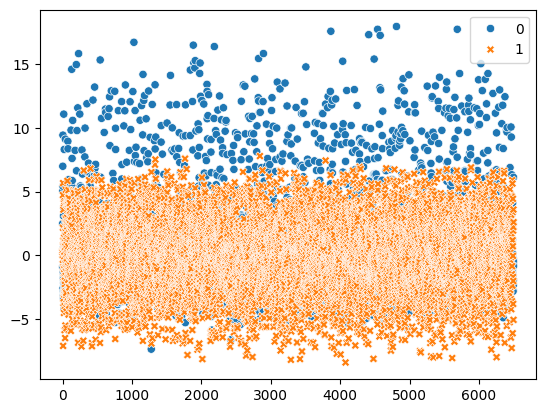

In [28]:
sns.scatterplot(X_prep)

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
y = OrdinalEncoder().fit_transform(pd.DataFrame(labels))

In [35]:
pd.DataFrame(labels)

,label
0,SOUTHERN DOGFACE
1,ADONIS
2,BROWN SIPROETA
3,MONARCH
4,GREEN CELLED CATTLEHEART
...,...
6494,MANGROVE SKIPPER
6495,MOURNING CLOAK
6496,APPOLLO
6497,ELBOWED PIERROT


In [36]:
np.unique(y)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74.])

In [38]:
np.unique(labels).shape

(75,)

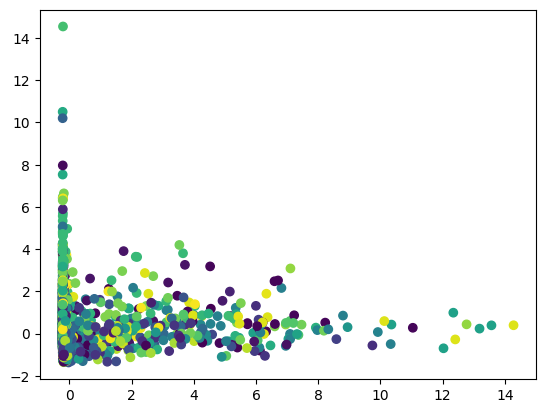

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=np.array(y))